# CELL VIABILITY OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR1.csv").iloc[:, 1:]
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR2.csv').iloc[:46, 1:]
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR3.csv').iloc[:, 1:]
lines = ["PC9", "KO", "KD", "KI", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [3]:
itp = 24

In [4]:
for ii in range(1, r1.columns.size):
    r1.iloc[:, ii] /= r1[r1["Elapsed"] == itp].iloc[0, ii]
    r2.iloc[:, ii] /= r2[r2["Elapsed"] == itp].iloc[0, ii]
    r3.iloc[:, ii] /= r3[r3["Elapsed"] == itp].iloc[0, ii]

Check time points in which there could be a significance influence of the initial seeding density. Note that if the initial time point (itp) is 24h, the cell populations growth is already differentiated and the correlation will almost always be significant.

In [5]:
r1_0 = r1[r1["Elapsed"] == 0].iloc[0, 1:]
r2_0 = r2[r2["Elapsed"] == 0].iloc[0, 1:]
r3_0 = r3[r3["Elapsed"] == 0].iloc[0, 1:]

for jj in (r1.iloc[:, 0]):
    pv1 = sp.stats.pearsonr(r1_0, r1[r1["Elapsed"] == jj].iloc[0, 1:])[1]
    pv2 = sp.stats.pearsonr(r2_0, r2[r2["Elapsed"] == jj].iloc[0, 1:])[1]
    pv3 = sp.stats.pearsonr(r3_0, r3[r3["Elapsed"] == jj].iloc[0, 1:])[1]
    if pv1 < 0.05 and itp == 0:
        print("BR1-Elapsed: ", jj)
    if pv2 < 0.05 and itp == 0:
        print("BR2-Elapsed: ", jj)
    if pv3 < 0.05 and itp == 0:
        print("BR3-Elapsed: ", jj)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [6]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [7]:
def TransformMatrixForSeaborn(x, l):
    y = pd.DataFrame()
    elapsed, lines, cv = [], [], []
    for idx, row in x.iterrows():
        df = pd.DataFrame(row).T
        elapsed.append(list(df["Elapsed"]) * (df.shape[1] - 1))
        lines.append(list(df.columns[1:]))
        cv.append(df.iloc[0, 1:].values)
    y["Elapsed"] = [e for sl in elapsed for e in sl]
    y["Lines"] = [e for sl in lines for e in sl]
    y["fold-change vs t=0"] = [e for sl in cv for e in sl]
    return y

## Time Course

### Untreated

In [8]:
r1_ut = r1.loc[:, r1.columns.str.contains('-UT')]
r1_ut.columns = lines
r2_ut = r2.loc[:, r2.columns.str.contains('-UT')]
r2_ut.columns = lines
r3_ut = r3.loc[:, r3.columns.str.contains('-UT')]
r3_ut.columns = lines
c_ut = pd.concat([r1_ut, r2_ut, r3_ut], axis=1)
c_ut = pd.concat([r1_ut, r2_ut], axis=1)
c_ut.insert(0, "Elapsed", r1.iloc[:, 0])
c_ut = c_ut[c_ut["Elapsed"] <= 120]
c_ut = c_ut[c_ut["Elapsed"] >= itp]

d_ut = TransformMatrixForSeaborn(c_ut.copy(), lines)

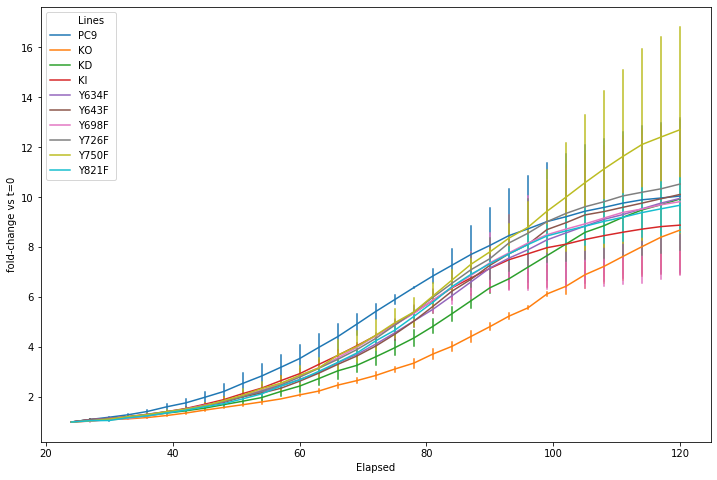

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.lineplot(x="Elapsed", y="fold-change vs t=0", hue="Lines", data=d_ut, err_style="bars", n_boot=100);

### AF154

In [10]:
r1_ab = r1.loc[:, r1.columns.str.contains('-A/E')]
r1_ab.columns = lines
r2_ab = r2.loc[:, r2.columns.str.contains('-A/E')]
r2_ab.columns = lines
r3_ab = r3.loc[:, r3.columns.str.contains('-A/E')]
r3_ab.columns = lines
# c_ab = pd.concat([r1_ab, r2_ab, r3_ab], axis=1)
c_ab = pd.concat([r1_ab, r2_ab], axis=1)
c_ab.insert(0, "Elapsed", r1.iloc[:, 0])
c_ab = c_ab[c_ab["Elapsed"] < 120]
c_ab = c_ab[c_ab["Elapsed"] >= itp]

d_ab = TransformMatrixForSeaborn(c_ab.copy(), lines)

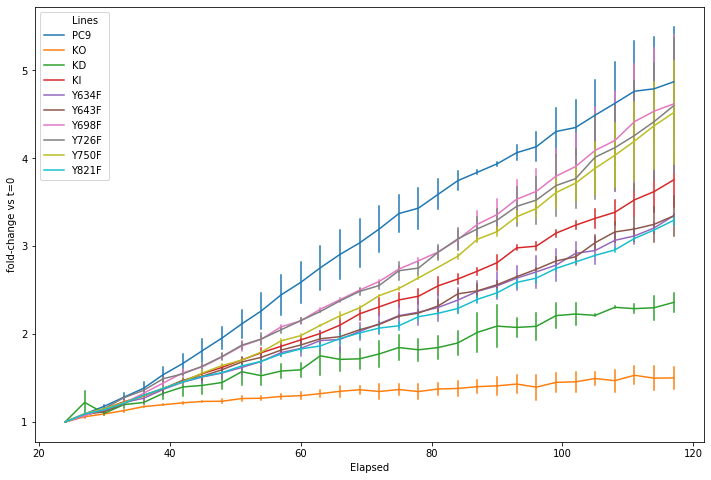

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.lineplot(x="Elapsed", y="fold-change vs t=0", hue="Lines", data=d_ab, err_style="bars", n_boot=100);

### Erlotinib

In [12]:
r1_erl = r1.loc[:, r1.columns.str.contains('-E')]
r1_erl.columns = lines
r2_erl = r2.loc[:, r2.columns.str.contains('-E')]
r2_erl.columns = lines
r3_erl = r3.loc[:, r3.columns.str.contains('-E')]
r3_erl.columns = lines
# c_erl = pd.concat([r1_erl, r2_erl, r3_erl], axis=1)
c_erl = pd.concat([r1_erl, r2_erl], axis=1)
c_erl.insert(0, "Elapsed", r1.iloc[:, 0])
c_erl = c_erl[c_erl["Elapsed"] < 120]
c_erl = c_erl[c_erl["Elapsed"] >= itp]

d_erl = TransformMatrixForSeaborn(c_erl.copy(), lines)

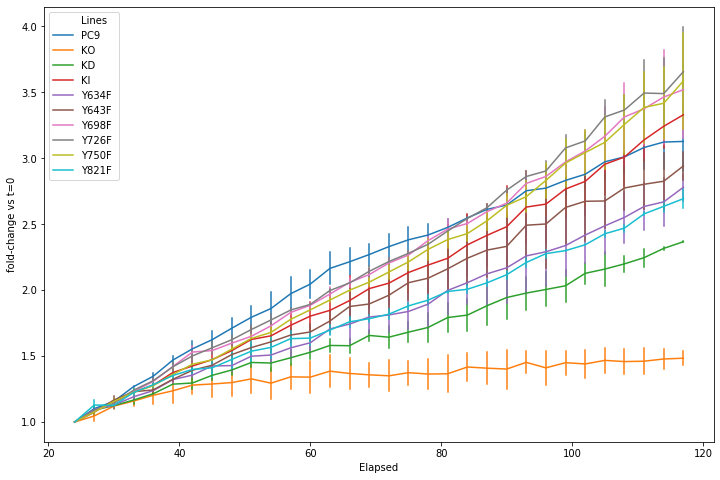

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.lineplot(x="Elapsed", y="fold-change vs t=0", hue="Lines", data=d_erl, err_style="bars", n_boot=100);

### At specified endpoint

In [14]:
from msresist.figures.figure1 import BarPlot_UtErlAF154

In [15]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR1.csv").iloc[:, 1:]
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR2.csv').iloc[:46, 1:]
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/20200130-AXLmutantsPhase_MeanTRs_BR3.csv').iloc[:, 1:]

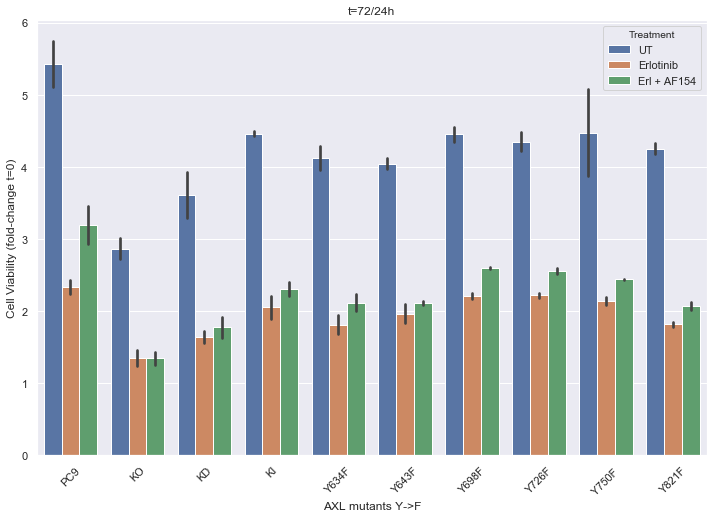

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ftp = 72
BarPlot_UtErlAF154(ax, r1, r2, r3, itp, ftp, lines)

In [17]:
for ii in range(1, r1.columns.size):
    r1.iloc[:, ii] /= r1[r1["Elapsed"] == itp].iloc[0, ii]
    r2.iloc[:, ii] /= r2[r2["Elapsed"] == itp].iloc[0, ii]
    r3.iloc[:, ii] /= r3[r3["Elapsed"] == itp].iloc[0, ii]

In [18]:
def fcTvsUTp(rs, ftp, l):
    fc_rs = []
    for i in range(len(rs)):
        ut = rs[i].loc[:, rs[i].columns.str.contains('-UT')]
        ut.columns = lines
        ut.insert(0, "Elapsed", rs[0].iloc[:, 0])
        e = rs[i].loc[:, rs[i].columns.str.contains('-E')]
        e.columns = lines
        e.insert(0, "Elapsed", rs[0].iloc[:, 0])
        a = rs[i].loc[:, rs[i].columns.str.contains('-A/E')]
        a.columns = lines
        a.insert(0, "Elapsed", rs[0].iloc[:, 0])
        e = pd.DataFrame(e[e["Elapsed"] == ftp].iloc[0, 1:].div(ut[ut["Elapsed"] == ftp].iloc[0, 1:])).reset_index()
        a = pd.DataFrame(a[a["Elapsed"] == ftp].iloc[0, 1:].div(ut[ut["Elapsed"] == ftp].iloc[0, 1:])).reset_index()
        e["AXL mutants Y->F"] = l
        a["AXL mutants Y->F"] = l
        e["Treatment"] = "Erlotinib"
        a["Treatment"] = "Erl + AF154"
        e = e[["index", "AXL mutants Y->F", "Treatment", int(ftp/3)]]
        a = a[["index", "AXL mutants Y->F", "Treatment", int(ftp/3)]]
        e.columns = ["index", "AXL mutants Y->F", "Treatment", "Cell Viability (fold-change t=0)"]
        a.columns = ["index", "AXL mutants Y->F", "Treatment", "Cell Viability (fold-change t=0)"]
        fc_rs.append(e)
        fc_rs.append(a)
    return fc_rs

In [25]:
rs = [r1, r2]
t_fc = fcTvsUTp(rs, ftp, lines)

In [26]:
# c = pd.concat([t_fc[0], t_fc[1], t_fc[2], t_fc[3], t_fc[4], t_fc[5]])
c = pd.concat([t_fc[0], t_fc[1], t_fc[2], t_fc[3]])

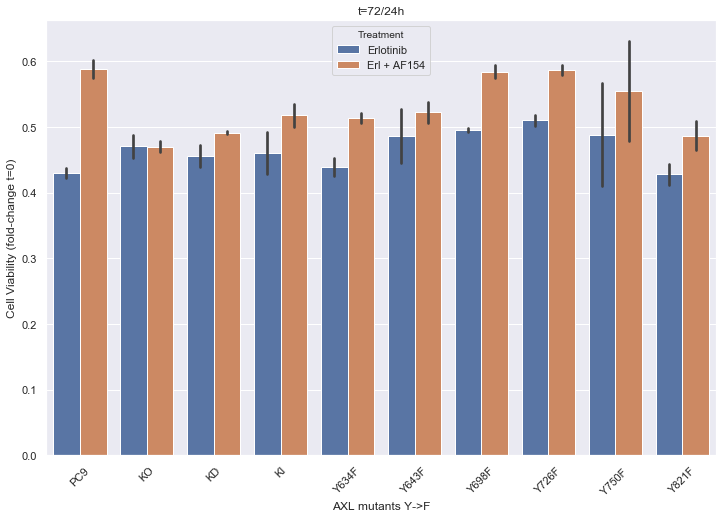

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax = sns.barplot(x="AXL mutants Y->F", y="Cell Viability (fold-change t=0)", hue="Treatment", data=c, ci="sd")
ax.set_title("t=" + str(ftp) + "/" + str(itp) + "h")
ax.set_xticklabels(lines, rotation=45);

## Cell Death